In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
res = pd.read_csv("benchmark-compression.csv", index_col=False)

In [3]:
res_int16 = res.query("filter == False and dtype == 'int16'")

In [4]:
res_int16

,probe,num_channels,duration,dtype,compressor,level,shuffle,filter,chunk_size,CR,C-speed,D-1s,D-10s
7,Neuronexus-32,32,900,int16,binary,0,no,False,1000,1.000000,9.54,0.00,0.00
8,Neuronexus-32,32,900,int16,binary,0,no,False,10000,1.000000,6.51,0.00,0.00
9,Neuronexus-32,32,900,int16,binary,0,no,False,100000,1.000000,6.64,0.00,0.00
16,Neuronexus-32,32,300,int16,binary,0,no,False,1000,1.000000,3.85,0.42,0.00
17,Neuronexus-32,32,300,int16,binary,0,no,False,10000,1.000000,2.12,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,Neuropixels-128,128,1800,int16,zlib,9,no,False,1000,2.153509,5633.48,0.07,0.67
3043,Neuropixels-128,128,1800,int16,zlib,9,auto,False,1000,2.268452,26480.62,0.08,0.74
3044,Neuropixels-128,128,1800,int16,zlib,9,bit,False,1000,2.259919,434.19,0.05,1.00
3045,Neuropixels-128,128,1800,int16,zlib,9,shuffle,False,1000,2.268452,26457.87,0.07,0.69


In [5]:
np.unique(res_int16.compressor)

array(['binary', 'blosclz', 'lz4', 'lz4hc', 'snappy', 'zlib', 'zstd'],
      dtype=object)

In [6]:
res_int16_nn32 = res_int16.query("probe == 'Neuronexus-32'")
res_int16_np128 = res.query("probe == 'Neuropixels-128'")

In [7]:
dur = 900
res_dur = res_int16_np128.query(f"duration == {dur}") #" and shuffle == 'bit'")

<IPython.core.display.Javascript object>


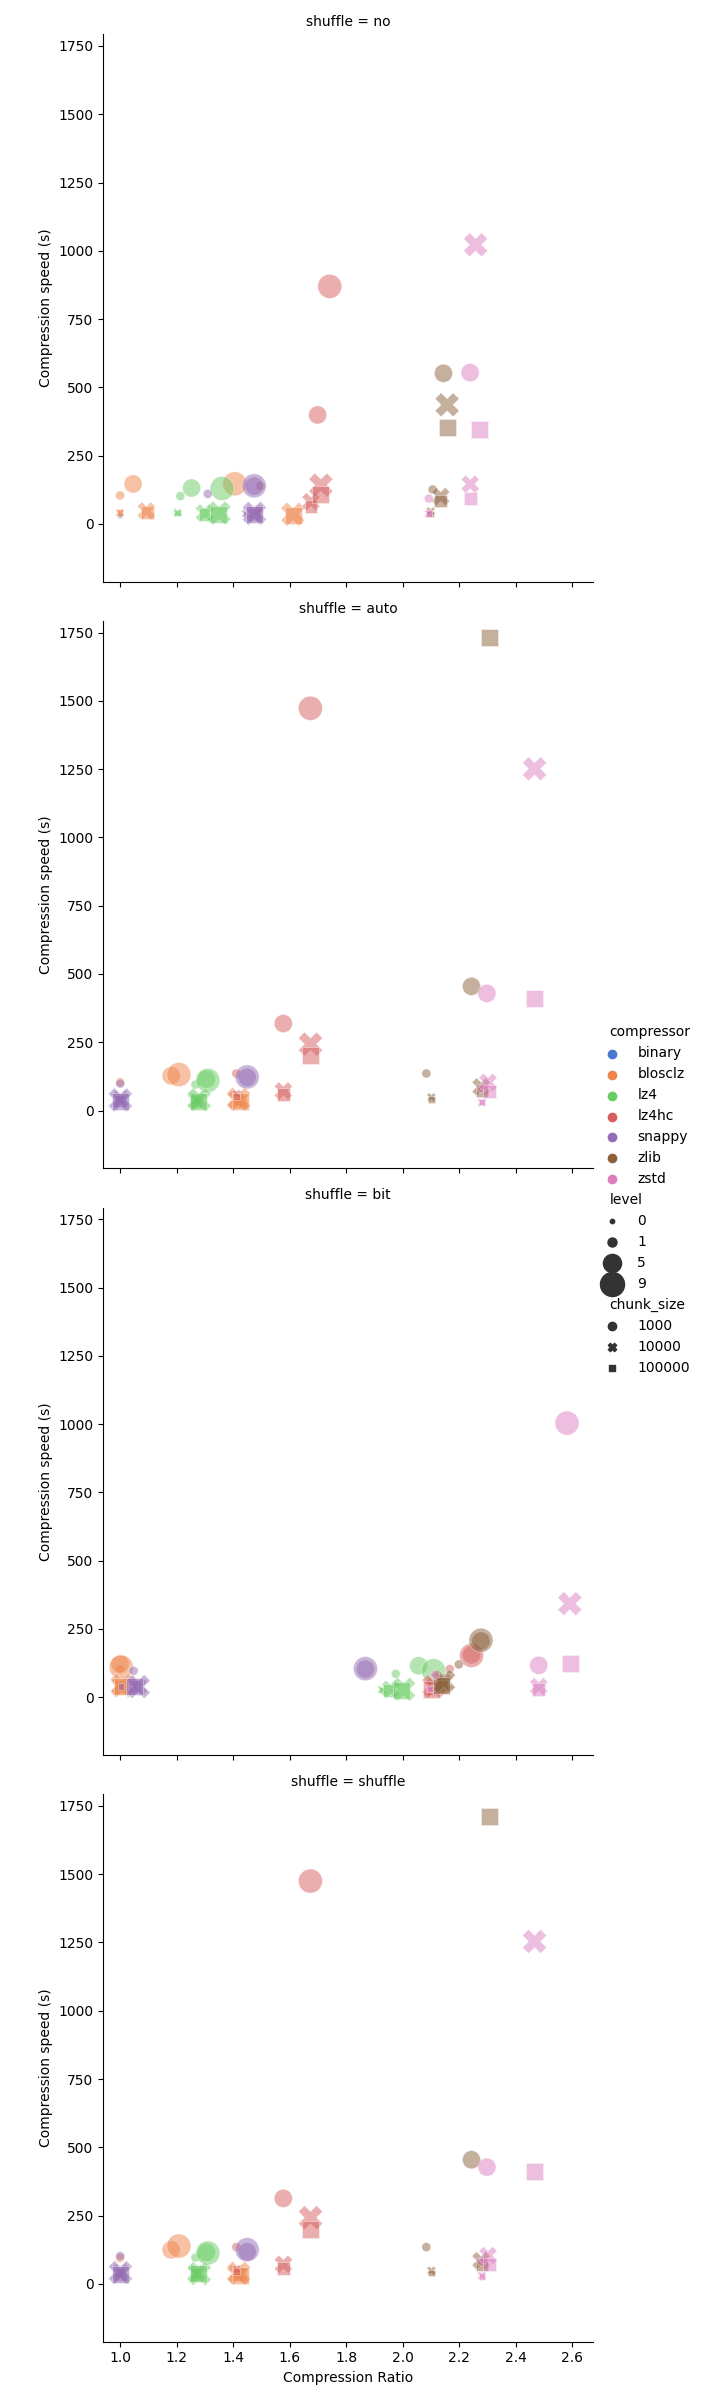

In [9]:
g = sns.relplot(x="CR", y="C-speed", hue="compressor", size="level", style="chunk_size",
                sizes=(10, 300), alpha=.5, palette="muted", row="shuffle",
                height=6, data=res_dur)
g.set_axis_labels("Compression Ratio", "Compression speed (s)")


<IPython.core.display.Javascript object>


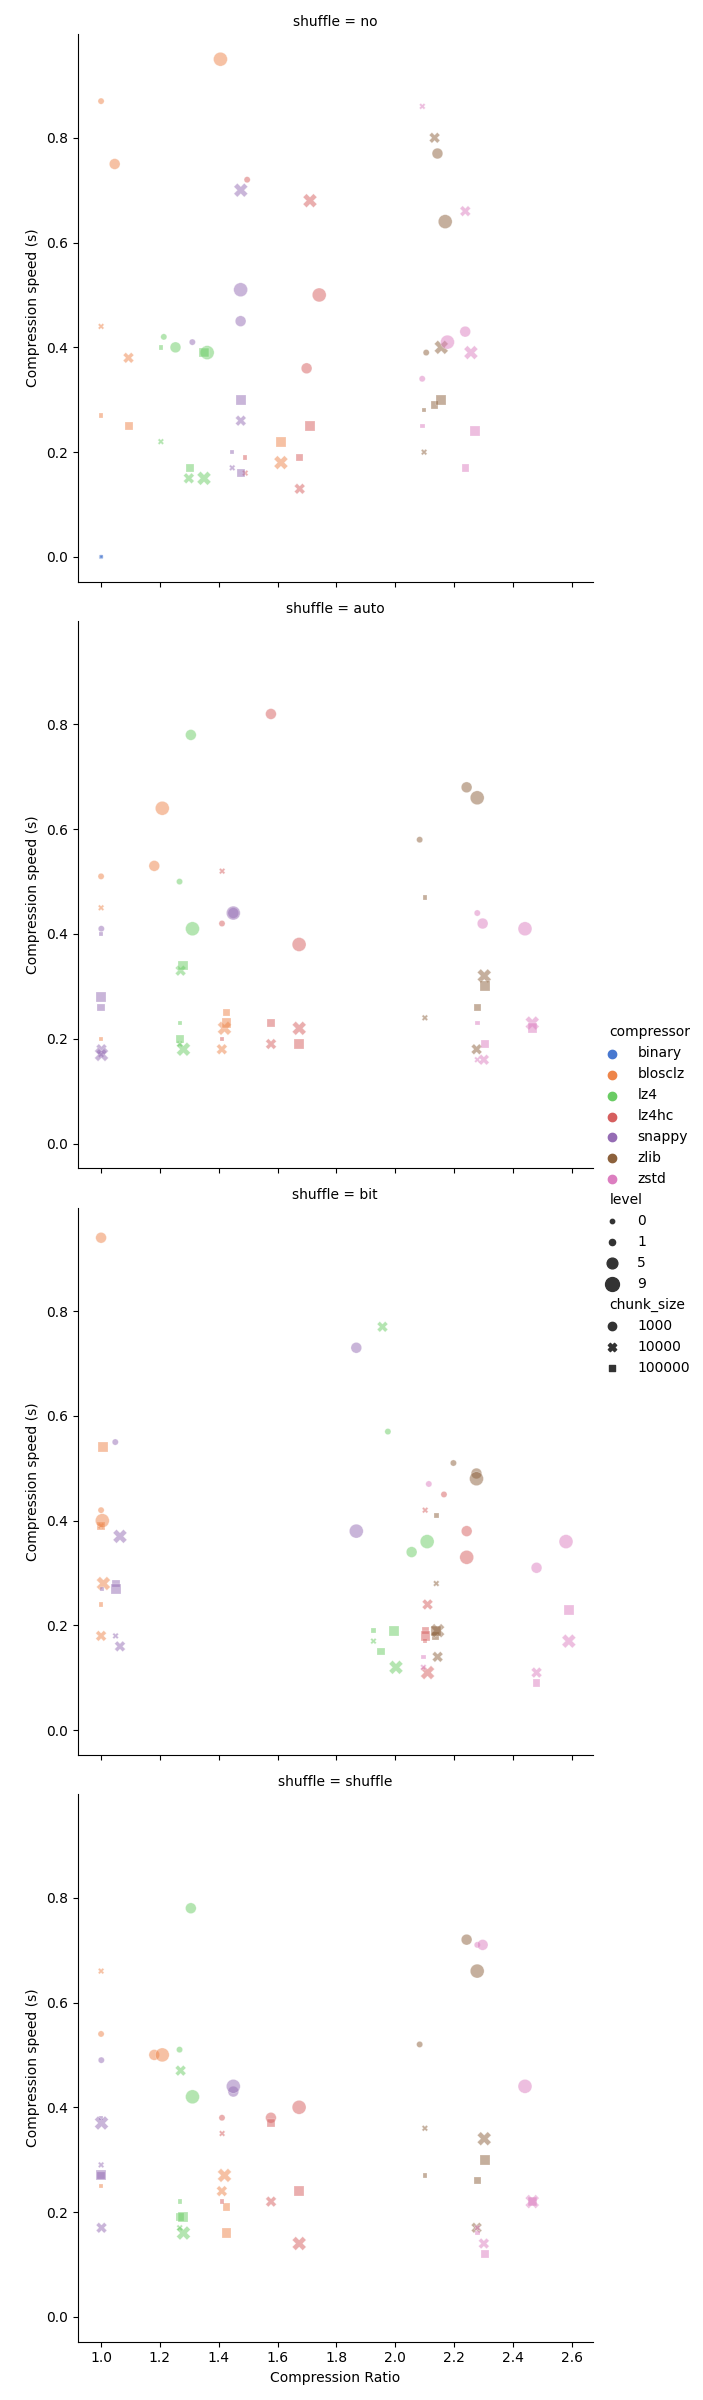

In [10]:
g2 = sns.relplot(x="CR", y="D-10s", hue="compressor", size="level", style="chunk_size",
                 sizes=(10, 100), alpha=.5, palette="muted", row="shuffle",
                 height=6, data=res_dur)
g2.set_axis_labels("Compression Ratio", "Decompression speed for 10s traces (s)")
